In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
data = pd.read_excel('C:/PYTHON/PPH/PPH.xlsx',na_values='nk')
#The 'nk' values in the data is actually case of missing values. To make the code understand that, we have passed it in 'na_values' paramter to the read_csv method.
data.head(10)

,race,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,deltype,induction,BL_total
0,NL Other,14,1,1.0,0,0,0.0,0,0,38.0,CS,0,800.0
1,Latino,14,1,1.0,0,0,0.0,0,0,NaN,Vag,0,350.0
2,Latino,16,2,1.0,0,0,0.0,0,0,39.0,Vag,0,530.0
3,Latino,16,1,1.0,0,0,0.0,0,0,38.0,Vag,1,220.0
4,Latino,16,1,1.0,0,1,0.0,0,0,35.0,Vag,1,1536.0
5,Latino,16,1,1.0,0,0,0.0,0,0,38.0,Vag,0,560.0
6,Latino,16,1,1.0,0,0,0.0,0,0,39.0,Vag,0,478.0
7,Latino,16,2,1.0,0,0,0.0,0,0,40.0,Vag,1,625.0
8,NL Black,17,1,1.0,0,0,0.0,0,0,40.0,CS,1,600.0
9,Latino,17,1,1.0,0,0,0.0,0,0,40.0,Vag,1,18.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 13 columns):
race         1988 non-null object
age          1988 non-null int64
gravida      1988 non-null int64
para         1987 non-null float64
PUS          1988 non-null int64
multiple     1988 non-null int64
MBP          1988 non-null float64
prev_cs      1988 non-null int64
DSLC         1988 non-null int64
GA           1982 non-null float64
deltype      1988 non-null object
induction    1988 non-null int64
BL_total     1988 non-null float64
dtypes: float64(4), int64(7), object(2)
memory usage: 202.0+ KB


In [5]:
data.describe()

,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,induction,BL_total
count,1988.000000,1988.000000,1987.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1982.000000,1988.000000,1988.000000
mean,29.926559,2.725855,2.170106,0.007545,0.027666,19.700201,0.189135,360.924044,38.143794,0.384809,449.087676
std,5.955432,1.759808,1.293820,0.086557,0.164055,14.507455,0.391714,950.097456,3.036877,0.486673,578.158804
min,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000
25%,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,130.000000
50%,30.000000,2.000000,2.000000,0.000000,0.000000,22.700000,0.000000,0.000000,39.000000,0.000000,300.000000
75%,34.000000,4.000000,3.000000,0.000000,0.000000,29.100000,0.000000,0.000000,40.000000,1.000000,565.500000
max,50.000000,12.000000,10.000000,1.000000,1.000000,91.000000,1.000000,6686.000000,42.000000,1.000000,8649.000000


In [6]:
for i, item in enumerate(data['DSLC']):
    if item==0.0:
        data['DSLC'][i]=6687
data['DSLC'].value_counts()

C:\Users\manzh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


6687    1612
930        4
1498       2
861        2
668        2
846        2
693        2
2335       2
1084       2
2201       2
913        2
1759       2
1529       2
2657       2
1349       2
730        2
1475       2
572        2
1418       2
1222       2
591        2
676        1
4762       1
662        1
736        1
722        1
678        1
4808       1
718        1
4824       1
        ... 
1356       1
1366       1
3427       1
1408       1
3460       1
1416       1
1431       1
3480       1
1313       1
1310       1
1309       1
1296       1
1200       1
1201       1
1214       1
1217       1
1223       1
3273       1
3276       1
3285       1
1238       1
1239       1
1241       1
5342       1
1247       1
1252       1
1264       1
1277       1
1279       1
4102       1
Name: DSLC, Length: 355, dtype: int64

In [7]:
data.describe()

,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,induction,BL_total
count,1988.000000,1988.000000,1987.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1982.000000,1988.000000,1988.000000
mean,29.926559,2.725855,2.170106,0.007545,0.027666,19.700201,0.189135,5783.179577,38.143794,0.384809,449.087676
std,5.955432,1.759808,1.293820,0.086557,0.164055,14.507455,0.391714,1961.603823,3.036877,0.486673,578.158804
min,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,312.000000,16.000000,0.000000,0.000000
25%,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6687.000000,38.000000,0.000000,130.000000
50%,30.000000,2.000000,2.000000,0.000000,0.000000,22.700000,0.000000,6687.000000,39.000000,0.000000,300.000000
75%,34.000000,4.000000,3.000000,0.000000,0.000000,29.100000,0.000000,6687.000000,40.000000,1.000000,565.500000
max,50.000000,12.000000,10.000000,1.000000,1.000000,91.000000,1.000000,6687.000000,42.000000,1.000000,8649.000000


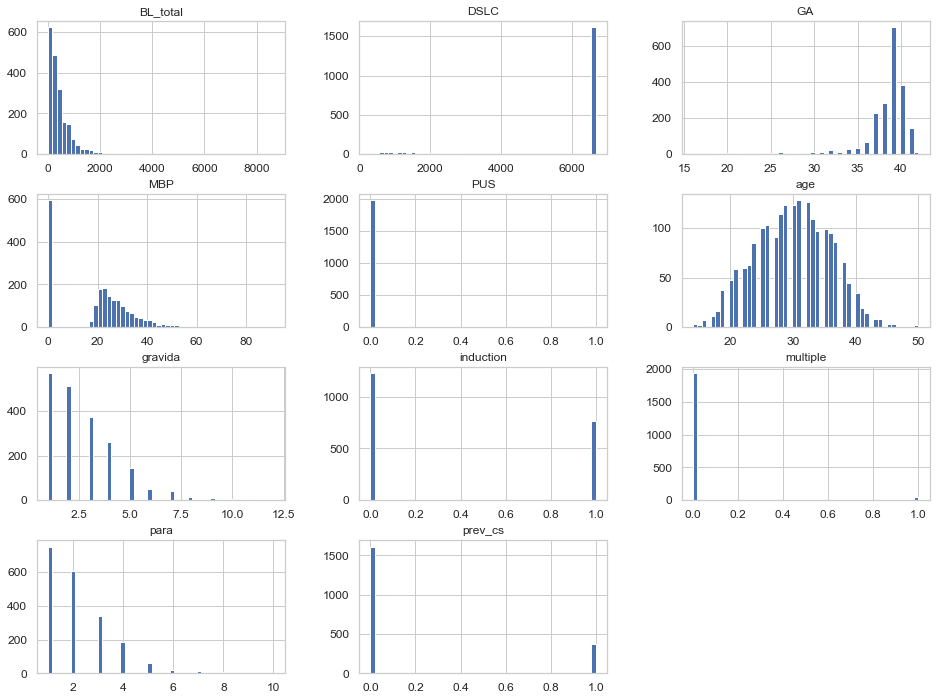

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(16,12))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027311F92F98>,
      dtype=object)

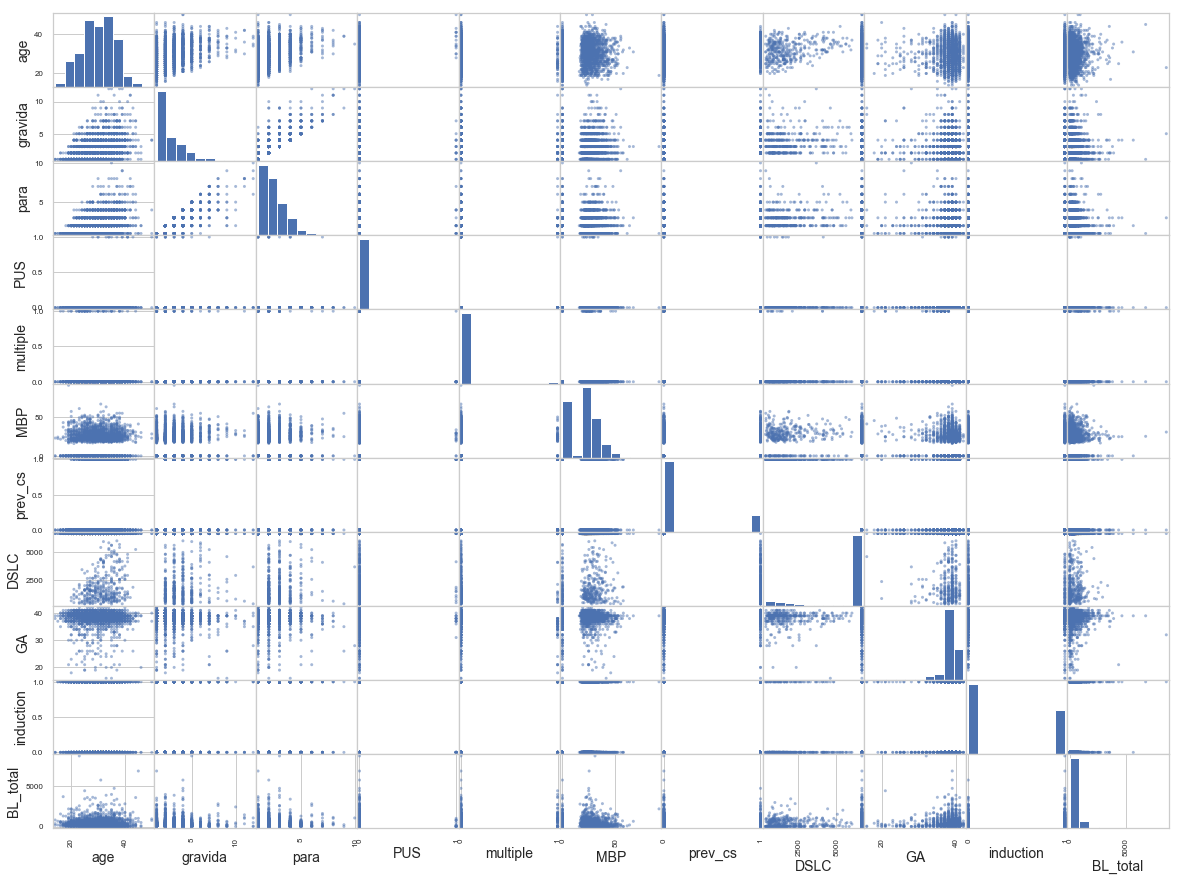

In [9]:
from pandas.plotting import scatter_matrix
attributes = data.columns.values

scatter_matrix(data[attributes], figsize=(20, 15))


In [10]:
data.dropna(axis=0,inplace=True)
data.info()
df=data
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1987
Data columns (total 13 columns):
race         1981 non-null object
age          1981 non-null int64
gravida      1981 non-null int64
para         1981 non-null float64
PUS          1981 non-null int64
multiple     1981 non-null int64
MBP          1981 non-null float64
prev_cs      1981 non-null int64
DSLC         1981 non-null int64
GA           1981 non-null float64
deltype      1981 non-null object
induction    1981 non-null int64
BL_total     1981 non-null float64
dtypes: float64(4), int64(7), object(2)
memory usage: 216.7+ KB


,race,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,deltype,induction,BL_total
0,NL Other,14,1,1.0,0,0,0.0,0,6687,38.0,CS,0,800.0
2,Latino,16,2,1.0,0,0,0.0,0,6687,39.0,Vag,0,530.0
3,Latino,16,1,1.0,0,0,0.0,0,6687,38.0,Vag,1,220.0
4,Latino,16,1,1.0,0,1,0.0,0,6687,35.0,Vag,1,1536.0
5,Latino,16,1,1.0,0,0,0.0,0,6687,38.0,Vag,0,560.0
6,Latino,16,1,1.0,0,0,0.0,0,6687,39.0,Vag,0,478.0
7,Latino,16,2,1.0,0,0,0.0,0,6687,40.0,Vag,1,625.0
8,NL Black,17,1,1.0,0,0,0.0,0,6687,40.0,CS,1,600.0
9,Latino,17,1,1.0,0,0,0.0,0,6687,40.0,Vag,1,18.0
10,NL Other,17,1,1.0,0,0,0.0,0,6687,39.0,Vag,0,290.0


In [11]:
target=[]
for i, item in enumerate(data['BL_total']):
    if float(item) >= 1000.0:
        target.append(1)
    if float(item) < 1000.0:
        target.append(0)
data['target']=target
data['target'].value_counts()
data.drop(['BL_total'], axis=1, inplace=True)


In [12]:
data.describe()

,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,induction,target
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,29.938415,2.727410,2.169611,0.007572,0.027764,19.769813,0.189803,5779.985866,38.150429,0.385159,0.106007
std,5.937575,1.759649,1.291583,0.086709,0.164337,14.485628,0.392244,1964.330676,3.023241,0.486756,0.307924
min,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,312.000000,16.000000,0.000000,0.000000
25%,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6687.000000,38.000000,0.000000,0.000000
50%,30.000000,2.000000,2.000000,0.000000,0.000000,22.700000,0.000000,6687.000000,39.000000,0.000000,0.000000
75%,34.000000,4.000000,3.000000,0.000000,0.000000,29.100000,0.000000,6687.000000,40.000000,1.000000,0.000000
max,50.000000,12.000000,10.000000,1.000000,1.000000,91.000000,1.000000,6687.000000,42.000000,1.000000,1.000000


In [13]:
for i, item in enumerate (data['MBP']):
    if item==0.0:
        data['MBP'][i]=22.7
data['MBP'].value_counts()


C:\Users\manzh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


22.7    600
21.0     19
25.0     19
26.6     18
27.5     17
21.6     17
23.0     17
22.3     16
22.1     15
21.5     15
25.8     15
24.6     14
28.3     14
20.4     13
23.3     13
23.4     13
22.5     13
21.1     13
20.0     13
24.0     12
23.2     12
21.9     12
29.3     11
27.4     11
25.1     11
24.7     11
20.2     11
23.5     11
21.3     10
24.3     10
       ... 
57.4      1
18.1      1
45.4      1
45.9      1
49.6      1
47.3      1
49.1      1
43.2      1
63.2      1
51.3      1
57.3      1
43.8      1
36.2      1
46.6      1
33.4      1
55.1      1
61.0      1
53.0      1
52.0      1
44.6      1
35.5      1
40.0      1
36.4      1
37.5      1
38.5      1
15.9      1
41.5      1
34.6      1
44.5      1
38.9      1
Name: MBP, Length: 296, dtype: int64

In [14]:
data.to_csv('C:/PYTHON/PPH/temp1.csv')


In [15]:
data=pd.read_csv('C:/PYTHON/PPH/temp1.csv')

In [16]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.head()

,race,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,deltype,induction,target
0,NL Other,14,1,1,0,0,22.7,0,6687,38,CS,0,0
1,Latino,16,2,1,0,0,0.0,0,6687,39,Vag,0,0
2,Latino,16,1,1,0,0,0.0,0,6687,38,Vag,1,0
3,Latino,16,1,1,0,1,0.0,0,6687,35,Vag,1,1
4,Latino,16,1,1,0,0,0.0,0,6687,38,Vag,0,0


In [17]:
cat_vars = ['race','deltype']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data = data1

In [18]:
cols = data.columns.values.tolist()

In [19]:
to_keep = [i for i in cols if i not in cat_vars]
data_final = data[to_keep]

In [20]:
data_final.head()

,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,induction,target,race_Latino,race_NL Asian,race_NL Black,race_NL Other,race_NL White,deltype_CS,deltype_Vag
0,14,1,1,0,0,22.7,0,6687,38,0,0,0,0,0,1,0,1,0
1,16,2,1,0,0,0.0,0,6687,39,0,0,1,0,0,0,0,0,1
2,16,1,1,0,0,0.0,0,6687,38,1,0,1,0,0,0,0,0,1
3,16,1,1,0,1,0.0,0,6687,35,1,1,1,0,0,0,0,0,1
4,16,1,1,0,0,0.0,0,6687,38,0,0,1,0,0,0,0,0,1


In [22]:
import scipy.stats as ss
def cramers_v(x, y):
    
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def logistic_correlation(dataframe):
    
    size = len(dataframe.columns.tolist())
    matrix = np.empty((size,size))
    for i, variable_x in enumerate(dataframe.columns.tolist()):
        x = dataframe[variable_x]
        result = 0
        for j, variable_y in enumerate(dataframe.columns.tolist()):
            y = dataframe[variable_y]
            if i > j :
                
                continue              
                
            elif i == j :
                
                result = 1
                
            else:
                
                result = cramers_v(x, y)
                
            matrix[i,j] = result
            matrix[j,i] = result
            
    result    = pd.DataFrame(index=dataframe.columns.tolist(),columns=dataframe.columns.tolist(),data=matrix)
    
    return  result

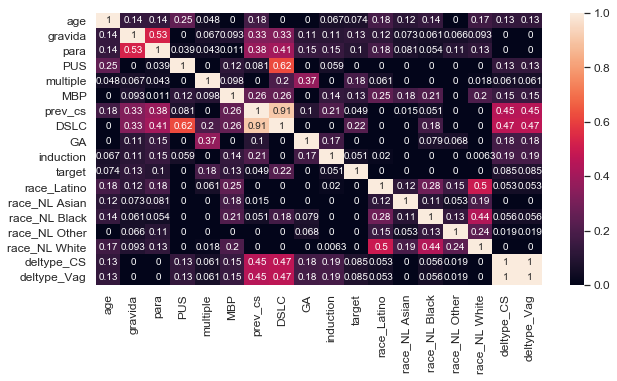

In [23]:
plt.subplots(figsize=(10,5))
sns.heatmap(logistic_correlation(data_final),annot=True)

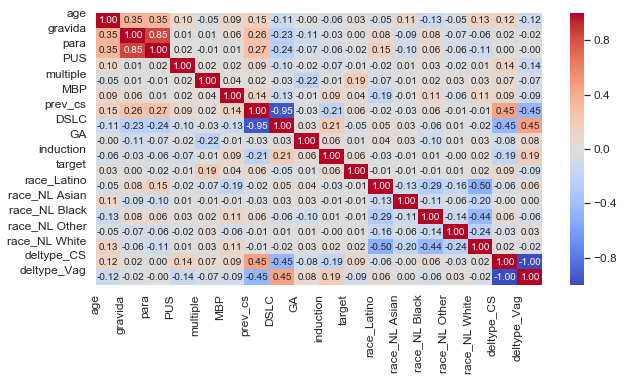

In [27]:
cor=data_final.corr()
fig, ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(cor.columns)), cor.columns);
plt.yticks(range(len(cor.columns)), cor.columns)
plt.show()

In [28]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 18 columns):
age              1978 non-null int64
gravida          1978 non-null int64
para             1978 non-null int64
PUS              1978 non-null int64
multiple         1978 non-null int64
MBP              1978 non-null float64
prev_cs          1978 non-null int64
DSLC             1978 non-null int64
GA               1978 non-null int64
induction        1978 non-null int64
target           1978 non-null int64
race_Latino      1978 non-null uint8
race_NL Asian    1978 non-null uint8
race_NL Black    1978 non-null uint8
race_NL Other    1978 non-null uint8
race_NL White    1978 non-null uint8
deltype_CS       1978 non-null uint8
deltype_Vag      1978 non-null uint8
dtypes: float64(1), int64(10), uint8(7)
memory usage: 183.6 KB


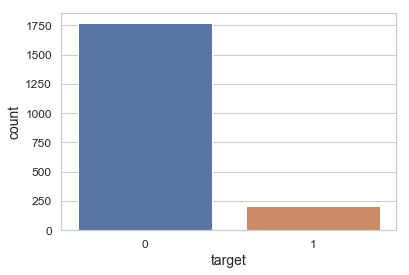

In [32]:
X = data_final.loc[:,data_final.columns != 'target']
Y = data_final.loc[:,data_final.columns == 'target']
sns.countplot(data_final.target)

In [34]:
!pip install imblearn

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\manzh\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\manzh\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manzh\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\manzh\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\manzh\anaconda3\lib\site-packages\pip\_inter

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train,X_TEST,Y_train,Y_TEST = train_test_split(X,Y,test_size=0.2,random_state=0)
columns=X_train.columns

Using TensorFlow backend.
C:\Users\manzh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\manzh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\manzh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\manzh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [71]:
Y_train=np.asarray(Y_train)
Y_train
X_train=np.asarray(X_train)

In [72]:
os_data_X,os_data_Y = os.fit_sample(X_train,Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_Y = pd.DataFrame(data=os_data_Y,columns=['target'])

C:\Users\manzh\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
print('Length of oversampled data is ',len(os_data_X))
print('length of people who have PPH',len(os_data_Y[os_data_Y['target']==1]))
print('length of people who have no PPH ',len(os_data_Y[os_data_Y['target']==0]))

Length of oversampled data is  2834
length of people who have PPH 1417
length of people who have no PPH  1417


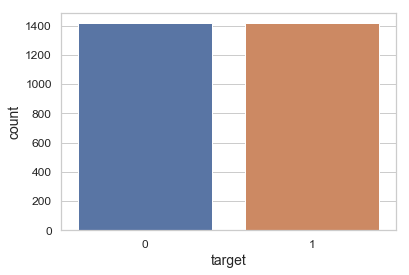

In [74]:
sns.countplot(os_data_Y.target)

In [76]:
cols = list(data_final.columns)
df = pd.DataFrame(data=os_data_X,columns=cols)
df = df.loc[:,df.columns != 'target']
df.head()

,age,gravida,para,PUS,multiple,MBP,prev_cs,DSLC,GA,induction,race_Latino,race_NL Asian,race_NL Black,race_NL Other,race_NL White,deltype_CS,deltype_Vag
0,28.0,3.0,2.0,0.0,0.0,0.0,1.0,591.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,39.0,2.0,1.0,0.0,0.0,26.0,0.0,6687.0,41.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,30.0,1.0,1.0,0.0,0.0,26.5,0.0,6687.0,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,25.0,3.0,3.0,0.0,1.0,0.0,0.0,6687.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,31.0,1.0,1.0,0.0,0.0,38.3,0.0,6687.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [78]:
rfe = RFE(logreg,17)
rfe = rfe.fit(os_data_X,os_data_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
os_data_X.columns

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\manzh\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['age', 'gravida', 'para', 'PUS', 'multiple', 'MBP', 'prev_cs', 'DSLC',
       'GA', 'induction', 'race_Latino', 'race_NL Asian', 'race_NL Black',
       'race_NL Other', 'race_NL White', 'deltype_CS', 'deltype_Vag'],
      dtype='object')

In [79]:
X = os_data_X
Y = os_data_Y['target'].iloc[:]

In [92]:
X_train
Y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [123]:
logreg.fit(X,Y)
Y_predict_train = logreg.predict(X)
Y_predict_test = logreg.predict(X_TEST)

C:\Users\manzh\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_dt_predict = dtree.predict(X_TEST)
Y_dtr_predict = dtree.predict(X)

In [125]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier()
rtree.fit(X_train,Y_train)
Y_rt_predict = rtree.predict(X_TEST)
Y_rtr_predict = rtree.predict(X)

C:\Users\manzh\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manzh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)knn
Y_knn_predict = knn.predict(X_TEST)
Y_knnr_predict = knn.predict(X)

C:\Users\manzh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)
Y_svm_predict = rtree.predict(X_TEST)
Y_svmr_predict = rtree.predict(X)

C:\Users\manzh\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manzh\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [148]:
from sklearn.model_selection import KFold

scores1 = []
scores2 = []
scores3 = []
scores4 = []
scores5 = []

cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train1, X_test1, Y_train1, Y_test1 = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train1,Y_train1)
    scores1.append(logreg.score(X_test1, Y_test1))
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train1,Y_train1)
    scores2.append(dtree.score(X_test1, Y_test1))
    rtree = RandomForestClassifier()
    rtree.fit(X_train1,Y_train1)
    scores3.append(rtree.score(X_test1, Y_test1))
    knn = KNeighborsClassifier()
    knn.fit(X_train1,Y_train1)
    scores4.append(knn.score(X_test1, Y_test1))
    svm = SVC(probability=True)
    svm.fit(X_train1,Y_train1)
    scores5.append(svm.score(X_test1, Y_test1))

C:\Users\manzh\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manzh\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manzh\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\manzh\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manzh\anaconda3\lib\site-packages\sklearn

In [150]:
print(np.round(np.mean(scores1),2))
print(np.round(np.mean(scores2),2))
print(np.round(np.mean(scores3),2))
print(np.round(np.mean(scores4),2))
print(np.round(np.mean(scores5),2))



0.56
0.88
0.93
0.75
0.69


In [140]:
from sklearn.metrics import accuracy_score
print('Accuracy score of test data using logistic is ',np.round(accuracy_score(Y_TEST,Y_predict_test),2))
print('Accuracy score of train data using logistic is ',np.round(accuracy_score(Y,Y_predict_train),2))
print('Accuracy score of test data using Decision Tree is ',np.round(accuracy_score(Y_TEST,Y_dt_predict),2))
print('Accuracy score of train data using Decision Tree is ',np.round(accuracy_score(Y,Y_dtr_predict),2))
print('Accuracy score of test data using Random Forest is ',np.round(accuracy_score(Y_TEST,Y_rt_predict),2))
print('Accuracy score of train data using Random Forest is ',np.round(accuracy_score(Y,Y_rtr_predict),2))
print('Accuracy score of test data using KNN is ',np.round(accuracy_score(Y_TEST,Y_knn_predict),2))
print('Accuracy score of train data using KNN is ',np.round(accuracy_score(Y,Y_knnr_predict),2))
print('Accuracy score of test data using SVM is ',np.round(accuracy_score(Y_TEST,Y_svm_predict),2))
print('Accuracy score of train data using SVM is ',np.round(accuracy_score(Y,Y_svmr_predict),2))

Accuracy score of test data using logistic is  0.61
Accuracy score of train data using logistic is  0.66
Accuracy score of test data using Decision Tree is  0.77
Accuracy score of train data using Decision Tree is  0.85
Accuracy score of test data using Random Forest is  0.89
Accuracy score of train data using Random Forest is  0.76
Accuracy score of test data using KNN is  0.87
Accuracy score of train data using KNN is  0.54
Accuracy score of test data using SVM is  0.86
Accuracy score of train data using SVM is  0.99


In [170]:
np.round(accuracy_score(Y,Y_svmr_predict),2)

0.99

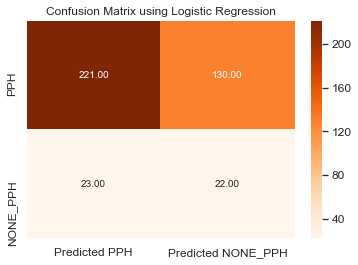

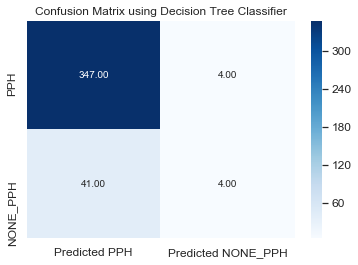

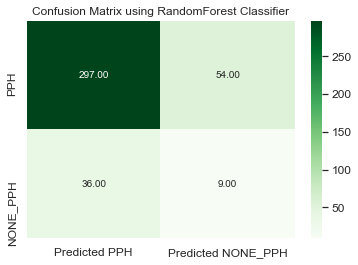

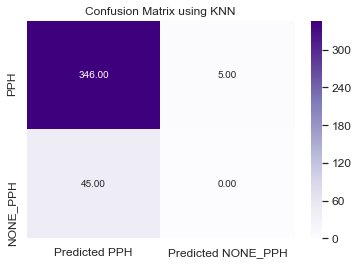

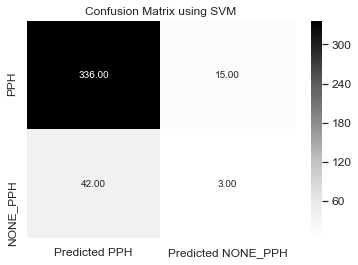

In [152]:
from sklearn.metrics import confusion_matrix

confusion_matrix2 = pd.DataFrame(confusion_matrix(Y_TEST, Y_rt_predict))
confusion_matrix3 = pd.DataFrame(confusion_matrix(Y_TEST, Y_dt_predict))
confusion_matrix1 = pd.DataFrame(confusion_matrix(Y_TEST, Y_predict_test))
confusion_matrix4 = pd.DataFrame(confusion_matrix(Y_TEST, Y_knn_predict))
confusion_matrix5 = pd.DataFrame(confusion_matrix(Y_TEST, Y_svm_predict))

confusion_matrix1.index = ['PPH','NONE_PPH']
confusion_matrix1.columns = ['Predicted PPH','Predicted NONE_PPH']
confusion_matrix2.index = ['PPH','NONE_PPH']
confusion_matrix2.columns = ['Predicted PPH','Predicted NONE_PPH']
confusion_matrix3.index = ['PPH','NONE_PPH']
confusion_matrix3.columns = ['Predicted PPH','Predicted NONE_PPH']
confusion_matrix4.index = ['PPH','NONE_PPH']
confusion_matrix4.columns = ['Predicted PPH','Predicted NONE_PPH']
confusion_matrix5.index = ['PPH','NONE_PPH']
confusion_matrix5.columns = ['Predicted PPH','Predicted NONE_PPH']
plt.title('Confusion Matrix using Logistic Regression')
sns.heatmap(confusion_matrix1,annot=True,cmap='Oranges',fmt='.2f')
plt.figure()
plt.title('Confusion Matrix using Decision Tree Classifier')
sns.heatmap(confusion_matrix2,annot=True,cmap='Blues',fmt='.2f')
plt.figure()
plt.title('Confusion Matrix using RandomForest Classifier')
sns.heatmap(confusion_matrix3,annot=True,cmap='Greens',fmt='.2f')
plt.figure()
plt.title('Confusion Matrix using KNN')
sns.heatmap(confusion_matrix4,annot=True,cmap='Purples',fmt='.2f')
plt.figure()
plt.title('Confusion Matrix using SVM')
sns.heatmap(confusion_matrix5,annot=True,cmap='Greys',fmt='.2f')


In [144]:
from sklearn.metrics import f1_score
print('Logistic regression F1-score: ',f1_score(Y_TEST,Y_predict_test))
print('Decision Tree F1-score: ',f1_score(Y_TEST,Y_dt_predict))
print('Random Forest F1-score: ',f1_score(Y_TEST,Y_rt_predict))
print('KNN F1-score: ',f1_score(Y_TEST,Y_knn_predict))
print('SVM F1-score: ',f1_score(Y_TEST,Y_svm_predict))

Logistic regression F1-score:  0.22335025380710666
Decision Tree F1-score:  0.16666666666666666
Random Forest F1-score:  0.1509433962264151
KNN F1-score:  0.0
SVM F1-score:  0.09523809523809522


In [145]:
from sklearn.metrics import classification_report 
print(classification_report(Y_TEST,Y_predict_test))
print(classification_report(Y_TEST,Y_dt_predict))
print(classification_report(Y_TEST,Y_rt_predict))
print(classification_report(Y_TEST,Y_knn_predict))
print(classification_report(Y_TEST,Y_svm_predict))

              precision    recall  f1-score   support

           0       0.91      0.63      0.74       351
           1       0.14      0.49      0.22        45

    accuracy                           0.61       396
   macro avg       0.53      0.56      0.48       396
weighted avg       0.82      0.61      0.68       396

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       351
           1       0.14      0.20      0.17        45

    accuracy                           0.77       396
   macro avg       0.52      0.52      0.52       396
weighted avg       0.81      0.77      0.79       396

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       351
           1       0.50      0.09      0.15        45

    accuracy                           0.89       396
   macro avg       0.70      0.54      0.55       396
weighted avg       0.85      0.89      0.85       396

              preci

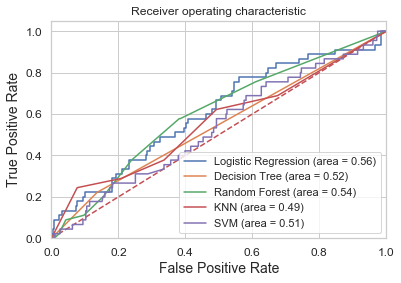

In [151]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(Y_TEST, Y_predict_test)
logit_roc_auc2 = roc_auc_score(Y_TEST, Y_dt_predict)
logit_roc_auc3 = roc_auc_score(Y_TEST, Y_rt_predict)
logit_roc_auc4 = roc_auc_score(Y_TEST, Y_knn_predict)
logit_roc_auc5 = roc_auc_score(Y_TEST, Y_svm_predict)
fpr, tpr, thresholds = roc_curve(Y_TEST, logreg.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#Decision Tree curve
fpr, tpr, thresholds = roc_curve(Y_TEST, dtree.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc2)
plt.legend(loc="lower right")
#Random Forest Curve
fpr, tpr, thresholds = roc_curve(Y_TEST, rtree.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc3)
plt.legend(loc="lower right")
#KNN Curve
fpr, tpr, thresholds = roc_curve(Y_TEST, knn.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc4)
plt.legend(loc="lower right")
#SVM Curve
fpr, tpr, thresholds = roc_curve(Y_TEST, svm.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc5)
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [153]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [154]:
sc_X=StandardScaler()
X_train_scaled=sc_X.fit_transform(X_train)
X_test_scaled=sc_X.fit_transform(X_TEST)
print (X_train_scaled.shape)
print (X_test_scaled.shape)

(1582, 17)
(396, 17)


In [155]:
from keras.utils import to_categorical 
def encode (data):
    print ('Shape of data(BEFORE encode): %s' % str(data.shape))
    encoded=to_categorical(data)
    print ('Shape of data (AFTER encode):%s\n' % str(encoded.shape))
    return encoded


In [156]:
y_train_encoded=encode(Y_train)

Shape of data(BEFORE encode): (1582, 1)
Shape of data (AFTER encode):(1582, 2)



In [157]:
y_test_encoded=encode(Y_TEST)

Shape of data(BEFORE encode): (396, 1)
Shape of data (AFTER encode):(396, 2)



In [163]:
classifier= Sequential()
classifier.add(Dense(units=9, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size=100, epochs=1150)

Instructions for updating:
Use tf.cast instead.
Train on 1582 samples, validate on 396 samples
Epoch 1/1150
1582/1582 [==============================] - 0s 188us/step - loss: 0.6901 - accuracy: 0.8682 - val_loss: 0.6863 - val_accuracy: 0.8864
Epoch 2/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.6823 - accuracy: 0.8957 - val_loss: 0.6778 - val_accuracy: 0.8864
Epoch 3/1150
1582/1582 [==============================] - 0s 22us/step - loss: 0.6722 - accuracy: 0.8957 - val_loss: 0.6653 - val_accuracy: 0.8864
Epoch 4/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.6559 - accuracy: 0.8957 - val_loss: 0.6444 - val_accuracy: 0.8864
Epoch 5/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.6288 - accuracy: 0.8957 - val_loss: 0.6094 - val_accuracy: 0.8864
Epoch 6/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.5859 - accuracy: 0.8957 - val_loss: 0.5593 - val_accuracy: 0.8864
Epoch 7/1150
1582/1582

1582/1582 [==============================] - 0s 27us/step - loss: 0.3024 - accuracy: 0.8957 - val_loss: 0.3554 - val_accuracy: 0.8864
Epoch 55/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.3023 - accuracy: 0.8957 - val_loss: 0.3550 - val_accuracy: 0.8864
Epoch 56/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.3023 - accuracy: 0.8957 - val_loss: 0.3554 - val_accuracy: 0.8864
Epoch 57/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.3019 - accuracy: 0.8957 - val_loss: 0.3550 - val_accuracy: 0.8864
Epoch 58/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.3019 - accuracy: 0.8957 - val_loss: 0.3551 - val_accuracy: 0.8864
Epoch 59/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.3018 - accuracy: 0.8957 - val_loss: 0.3546 - val_accuracy: 0.8864
Epoch 60/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.3016 - accuracy: 0.8957 - val_loss: 0.3553 -

1582/1582 [==============================] - 0s 25us/step - loss: 0.2955 - accuracy: 0.8957 - val_loss: 0.3622 - val_accuracy: 0.8864
Epoch 110/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2953 - accuracy: 0.8957 - val_loss: 0.3621 - val_accuracy: 0.8864
Epoch 111/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2954 - accuracy: 0.8957 - val_loss: 0.3616 - val_accuracy: 0.8864
Epoch 112/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2953 - accuracy: 0.8957 - val_loss: 0.3631 - val_accuracy: 0.8864
Epoch 113/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2949 - accuracy: 0.8957 - val_loss: 0.3626 - val_accuracy: 0.8864
Epoch 114/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2949 - accuracy: 0.8957 - val_loss: 0.3622 - val_accuracy: 0.8864
Epoch 115/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2949 - accuracy: 0.8957 - val_loss: 0.

1582/1582 [==============================] - 0s 23us/step - loss: 0.2905 - accuracy: 0.8995 - val_loss: 0.3706 - val_accuracy: 0.8889
Epoch 165/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2903 - accuracy: 0.8992 - val_loss: 0.3701 - val_accuracy: 0.8889
Epoch 166/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2902 - accuracy: 0.8989 - val_loss: 0.3706 - val_accuracy: 0.8889
Epoch 167/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2902 - accuracy: 0.8992 - val_loss: 0.3709 - val_accuracy: 0.8889
Epoch 168/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2903 - accuracy: 0.9008 - val_loss: 0.3704 - val_accuracy: 0.8889
Epoch 169/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2902 - accuracy: 0.9004 - val_loss: 0.3716 - val_accuracy: 0.8889
Epoch 170/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2902 - accuracy: 0.9004 - val_loss: 0.

Epoch 219/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2869 - accuracy: 0.9001 - val_loss: 0.3765 - val_accuracy: 0.8889
Epoch 220/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2869 - accuracy: 0.8998 - val_loss: 0.3776 - val_accuracy: 0.8889
Epoch 221/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2867 - accuracy: 0.9001 - val_loss: 0.3771 - val_accuracy: 0.8889
Epoch 222/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2867 - accuracy: 0.9001 - val_loss: 0.3771 - val_accuracy: 0.8889
Epoch 223/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2866 - accuracy: 0.9001 - val_loss: 0.3774 - val_accuracy: 0.8889
Epoch 224/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2868 - accuracy: 0.9001 - val_loss: 0.3782 - val_accuracy: 0.8876
Epoch 225/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2866 - accuracy: 0.8998

Epoch 274/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2849 - accuracy: 0.9001 - val_loss: 0.3854 - val_accuracy: 0.8876
Epoch 275/1150
1582/1582 [==============================] - ETA: 0s - loss: 0.2951 - accuracy: 0.90 - 0s 26us/step - loss: 0.2846 - accuracy: 0.9001 - val_loss: 0.3848 - val_accuracy: 0.8889
Epoch 276/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2843 - accuracy: 0.9001 - val_loss: 0.3842 - val_accuracy: 0.8864
Epoch 277/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2845 - accuracy: 0.9001 - val_loss: 0.3844 - val_accuracy: 0.8864
Epoch 278/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2843 - accuracy: 0.9001 - val_loss: 0.3849 - val_accuracy: 0.8876
Epoch 279/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2845 - accuracy: 0.9001 - val_loss: 0.3847 - val_accuracy: 0.8876
Epoch 280/1150
1582/1582 [==============================] - 0s 2

Epoch 329/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2825 - accuracy: 0.9014 - val_loss: 0.3886 - val_accuracy: 0.8813
Epoch 330/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2821 - accuracy: 0.9014 - val_loss: 0.3900 - val_accuracy: 0.8813
Epoch 331/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2822 - accuracy: 0.9014 - val_loss: 0.3894 - val_accuracy: 0.8813
Epoch 332/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2820 - accuracy: 0.9020 - val_loss: 0.3901 - val_accuracy: 0.8813
Epoch 333/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2820 - accuracy: 0.9017 - val_loss: 0.3897 - val_accuracy: 0.8813
Epoch 334/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2820 - accuracy: 0.9014 - val_loss: 0.3899 - val_accuracy: 0.8813
Epoch 335/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2821 - accuracy: 0.9017

Epoch 384/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2806 - accuracy: 0.9020 - val_loss: 0.3952 - val_accuracy: 0.8813
Epoch 385/1150
1582/1582 [==============================] - 0s 24us/step - loss: 0.2804 - accuracy: 0.9020 - val_loss: 0.3957 - val_accuracy: 0.8813
Epoch 386/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2804 - accuracy: 0.9027 - val_loss: 0.3947 - val_accuracy: 0.8813
Epoch 387/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2805 - accuracy: 0.9023 - val_loss: 0.3951 - val_accuracy: 0.8813
Epoch 388/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2806 - accuracy: 0.9027 - val_loss: 0.3956 - val_accuracy: 0.8813
Epoch 389/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2806 - accuracy: 0.9020 - val_loss: 0.3953 - val_accuracy: 0.8813
Epoch 390/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2806 - accuracy: 0.9020

Epoch 439/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2795 - accuracy: 0.9033 - val_loss: 0.3997 - val_accuracy: 0.8838
Epoch 440/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2795 - accuracy: 0.9033 - val_loss: 0.4001 - val_accuracy: 0.8838
Epoch 441/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2795 - accuracy: 0.9033 - val_loss: 0.4000 - val_accuracy: 0.8838
Epoch 442/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2795 - accuracy: 0.9033 - val_loss: 0.4011 - val_accuracy: 0.8838
Epoch 443/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2796 - accuracy: 0.9039 - val_loss: 0.4001 - val_accuracy: 0.8838
Epoch 444/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2792 - accuracy: 0.9033 - val_loss: 0.4001 - val_accuracy: 0.8838
Epoch 445/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2796 - accuracy: 0.9039

Epoch 494/1150
1582/1582 [==============================] - 0s 36us/step - loss: 0.2783 - accuracy: 0.9033 - val_loss: 0.4026 - val_accuracy: 0.8838
Epoch 495/1150
1582/1582 [==============================] - 0s 33us/step - loss: 0.2784 - accuracy: 0.9039 - val_loss: 0.4034 - val_accuracy: 0.8838
Epoch 496/1150
1582/1582 [==============================] - 0s 44us/step - loss: 0.2786 - accuracy: 0.9033 - val_loss: 0.4040 - val_accuracy: 0.8838
Epoch 497/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2783 - accuracy: 0.9046 - val_loss: 0.4035 - val_accuracy: 0.8838
Epoch 498/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2784 - accuracy: 0.9049 - val_loss: 0.4018 - val_accuracy: 0.8838
Epoch 499/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2783 - accuracy: 0.9046 - val_loss: 0.4022 - val_accuracy: 0.8838
Epoch 500/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2784 - accuracy: 0.9033

Epoch 549/1150
1582/1582 [==============================] - 0s 34us/step - loss: 0.2778 - accuracy: 0.9058 - val_loss: 0.4087 - val_accuracy: 0.8838
Epoch 550/1150
1582/1582 [==============================] - 0s 34us/step - loss: 0.2774 - accuracy: 0.9049 - val_loss: 0.4078 - val_accuracy: 0.8838
Epoch 551/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2774 - accuracy: 0.9064 - val_loss: 0.4068 - val_accuracy: 0.8838
Epoch 552/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2776 - accuracy: 0.9058 - val_loss: 0.4070 - val_accuracy: 0.8838
Epoch 553/1150
1582/1582 [==============================] - 0s 37us/step - loss: 0.2773 - accuracy: 0.9058 - val_loss: 0.4090 - val_accuracy: 0.8838
Epoch 554/1150
1582/1582 [==============================] - 0s 38us/step - loss: 0.2774 - accuracy: 0.9058 - val_loss: 0.4071 - val_accuracy: 0.8838
Epoch 555/1150
1582/1582 [==============================] - 0s 40us/step - loss: 0.2772 - accuracy: 0.9058

Epoch 604/1150
1582/1582 [==============================] - 0s 34us/step - loss: 0.2767 - accuracy: 0.9046 - val_loss: 0.4105 - val_accuracy: 0.8889
Epoch 605/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2764 - accuracy: 0.9046 - val_loss: 0.4099 - val_accuracy: 0.8838
Epoch 606/1150
1582/1582 [==============================] - 0s 33us/step - loss: 0.2764 - accuracy: 0.9052 - val_loss: 0.4095 - val_accuracy: 0.8864
Epoch 607/1150
1582/1582 [==============================] - 0s 33us/step - loss: 0.2763 - accuracy: 0.9058 - val_loss: 0.4099 - val_accuracy: 0.8864
Epoch 608/1150
1582/1582 [==============================] - 0s 29us/step - loss: 0.2767 - accuracy: 0.9058 - val_loss: 0.4117 - val_accuracy: 0.8864
Epoch 609/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2765 - accuracy: 0.9052 - val_loss: 0.4110 - val_accuracy: 0.8889
Epoch 610/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2764 - accuracy: 0.9052

Epoch 659/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2754 - accuracy: 0.9061 - val_loss: 0.4134 - val_accuracy: 0.8864
Epoch 660/1150
1582/1582 [==============================] - 0s 35us/step - loss: 0.2757 - accuracy: 0.9071 - val_loss: 0.4134 - val_accuracy: 0.8813
Epoch 661/1150
1582/1582 [==============================] - 0s 42us/step - loss: 0.2756 - accuracy: 0.9052 - val_loss: 0.4139 - val_accuracy: 0.8864
Epoch 662/1150
1582/1582 [==============================] - 0s 39us/step - loss: 0.2751 - accuracy: 0.9064 - val_loss: 0.4140 - val_accuracy: 0.8813
Epoch 663/1150
1582/1582 [==============================] - 0s 43us/step - loss: 0.2751 - accuracy: 0.9068 - val_loss: 0.4143 - val_accuracy: 0.8864
Epoch 664/1150
1582/1582 [==============================] - 0s 31us/step - loss: 0.2750 - accuracy: 0.9071 - val_loss: 0.4133 - val_accuracy: 0.8864
Epoch 665/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2751 - accuracy: 0.9064

Epoch 714/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2744 - accuracy: 0.9064 - val_loss: 0.4161 - val_accuracy: 0.8813
Epoch 715/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2747 - accuracy: 0.9071 - val_loss: 0.4168 - val_accuracy: 0.8813
Epoch 716/1150
1582/1582 [==============================] - 0s 29us/step - loss: 0.2744 - accuracy: 0.9071 - val_loss: 0.4163 - val_accuracy: 0.8813
Epoch 717/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2744 - accuracy: 0.9064 - val_loss: 0.4170 - val_accuracy: 0.8813
Epoch 718/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2745 - accuracy: 0.9071 - val_loss: 0.4165 - val_accuracy: 0.8813
Epoch 719/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2742 - accuracy: 0.9064 - val_loss: 0.4160 - val_accuracy: 0.8813
Epoch 720/1150
1582/1582 [==============================] - 0s 33us/step - loss: 0.2742 - accuracy: 0.9064

Epoch 769/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2736 - accuracy: 0.9064 - val_loss: 0.4194 - val_accuracy: 0.8813
Epoch 770/1150
1582/1582 [==============================] - 0s 23us/step - loss: 0.2739 - accuracy: 0.9064 - val_loss: 0.4190 - val_accuracy: 0.8813
Epoch 771/1150
1582/1582 [==============================] - 0s 41us/step - loss: 0.2738 - accuracy: 0.9071 - val_loss: 0.4191 - val_accuracy: 0.8813
Epoch 772/1150
1582/1582 [==============================] - 0s 47us/step - loss: 0.2740 - accuracy: 0.9064 - val_loss: 0.4181 - val_accuracy: 0.8813
Epoch 773/1150
1582/1582 [==============================] - 0s 21us/step - loss: 0.2742 - accuracy: 0.9064 - val_loss: 0.4198 - val_accuracy: 0.8813
Epoch 774/1150
1582/1582 [==============================] - 0s 21us/step - loss: 0.2741 - accuracy: 0.9071 - val_loss: 0.4198 - val_accuracy: 0.8813
Epoch 775/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2737 - accuracy: 0.9064

Epoch 824/1150
1582/1582 [==============================] - 0s 37us/step - loss: 0.2733 - accuracy: 0.9064 - val_loss: 0.4203 - val_accuracy: 0.8813
Epoch 825/1150
1582/1582 [==============================] - 0s 29us/step - loss: 0.2734 - accuracy: 0.9064 - val_loss: 0.4208 - val_accuracy: 0.8813
Epoch 826/1150
1582/1582 [==============================] - 0s 31us/step - loss: 0.2731 - accuracy: 0.9064 - val_loss: 0.4196 - val_accuracy: 0.8813
Epoch 827/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2735 - accuracy: 0.9064 - val_loss: 0.4182 - val_accuracy: 0.8813
Epoch 828/1150
1582/1582 [==============================] - 0s 31us/step - loss: 0.2735 - accuracy: 0.9064 - val_loss: 0.4207 - val_accuracy: 0.8813
Epoch 829/1150
1582/1582 [==============================] - 0s 31us/step - loss: 0.2736 - accuracy: 0.9064 - val_loss: 0.4187 - val_accuracy: 0.8813
Epoch 830/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2730 - accuracy: 0.9064

Epoch 879/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2729 - accuracy: 0.9064 - val_loss: 0.4218 - val_accuracy: 0.8813
Epoch 880/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2732 - accuracy: 0.9064 - val_loss: 0.4201 - val_accuracy: 0.8813
Epoch 881/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2729 - accuracy: 0.9064 - val_loss: 0.4211 - val_accuracy: 0.8813
Epoch 882/1150
1582/1582 [==============================] - 0s 46us/step - loss: 0.2732 - accuracy: 0.9064 - val_loss: 0.4215 - val_accuracy: 0.8788
Epoch 883/1150
1582/1582 [==============================] - 0s 33us/step - loss: 0.2729 - accuracy: 0.9064 - val_loss: 0.4210 - val_accuracy: 0.8813
Epoch 884/1150
1582/1582 [==============================] - 0s 34us/step - loss: 0.2733 - accuracy: 0.9064 - val_loss: 0.4205 - val_accuracy: 0.8813
Epoch 885/1150
1582/1582 [==============================] - 0s 31us/step - loss: 0.2729 - accuracy: 0.9064

Epoch 934/1150
1582/1582 [==============================] - 0s 31us/step - loss: 0.2730 - accuracy: 0.9058 - val_loss: 0.4231 - val_accuracy: 0.8813
Epoch 935/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2727 - accuracy: 0.9064 - val_loss: 0.4232 - val_accuracy: 0.8813
Epoch 936/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2725 - accuracy: 0.9064 - val_loss: 0.4229 - val_accuracy: 0.8788
Epoch 937/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2726 - accuracy: 0.9064 - val_loss: 0.4241 - val_accuracy: 0.8813
Epoch 938/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2729 - accuracy: 0.9064 - val_loss: 0.4220 - val_accuracy: 0.8813
Epoch 939/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2732 - accuracy: 0.9064 - val_loss: 0.4226 - val_accuracy: 0.8813
Epoch 940/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2729 - accuracy: 0.9064

Epoch 989/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2724 - accuracy: 0.9071 - val_loss: 0.4255 - val_accuracy: 0.8813
Epoch 990/1150
1582/1582 [==============================] - 0s 29us/step - loss: 0.2724 - accuracy: 0.9064 - val_loss: 0.4248 - val_accuracy: 0.8813
Epoch 991/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2724 - accuracy: 0.9077 - val_loss: 0.4253 - val_accuracy: 0.8788
Epoch 992/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2725 - accuracy: 0.9071 - val_loss: 0.4238 - val_accuracy: 0.8813
Epoch 993/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2725 - accuracy: 0.9071 - val_loss: 0.4248 - val_accuracy: 0.8788
Epoch 994/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2725 - accuracy: 0.9064 - val_loss: 0.4249 - val_accuracy: 0.8813
Epoch 995/1150
1582/1582 [==============================] - 0s 30us/step - loss: 0.2723 - accuracy: 0.9077

Epoch 1044/1150
1582/1582 [==============================] - 0s 37us/step - loss: 0.2724 - accuracy: 0.9068 - val_loss: 0.4250 - val_accuracy: 0.8788
Epoch 1045/1150
1582/1582 [==============================] - 0s 37us/step - loss: 0.2727 - accuracy: 0.9071 - val_loss: 0.4273 - val_accuracy: 0.8813
Epoch 1046/1150
1582/1582 [==============================] - 0s 28us/step - loss: 0.2722 - accuracy: 0.9071 - val_loss: 0.4254 - val_accuracy: 0.8813
Epoch 1047/1150
1582/1582 [==============================] - 0s 18us/step - loss: 0.2721 - accuracy: 0.9071 - val_loss: 0.4248 - val_accuracy: 0.8813
Epoch 1048/1150
1582/1582 [==============================] - 0s 20us/step - loss: 0.2722 - accuracy: 0.9068 - val_loss: 0.4254 - val_accuracy: 0.8801
Epoch 1049/1150
1582/1582 [==============================] - 0s 25us/step - loss: 0.2722 - accuracy: 0.9064 - val_loss: 0.4253 - val_accuracy: 0.8813
Epoch 1050/1150
1582/1582 [==============================] - 0s 21us/step - loss: 0.2726 - accuracy:

1582/1582 [==============================] - 0s 23us/step - loss: 0.2719 - accuracy: 0.9064 - val_loss: 0.4266 - val_accuracy: 0.8813
Epoch 1099/1150
1582/1582 [==============================] - 0s 27us/step - loss: 0.2720 - accuracy: 0.9064 - val_loss: 0.4261 - val_accuracy: 0.8813
Epoch 1100/1150
1582/1582 [==============================] - 0s 26us/step - loss: 0.2726 - accuracy: 0.9064 - val_loss: 0.4274 - val_accuracy: 0.8813
Epoch 1101/1150
1582/1582 [==============================] - 0s 33us/step - loss: 0.2721 - accuracy: 0.9058 - val_loss: 0.4259 - val_accuracy: 0.8813
Epoch 1102/1150
1582/1582 [==============================] - 0s 38us/step - loss: 0.2720 - accuracy: 0.9058 - val_loss: 0.4263 - val_accuracy: 0.8813
Epoch 1103/1150
1582/1582 [==============================] - 0s 32us/step - loss: 0.2719 - accuracy: 0.9064 - val_loss: 0.4275 - val_accuracy: 0.8813
Epoch 1104/1150
1582/1582 [==============================] - 0s 36us/step - loss: 0.2719 - accuracy: 0.9058 - val_lo

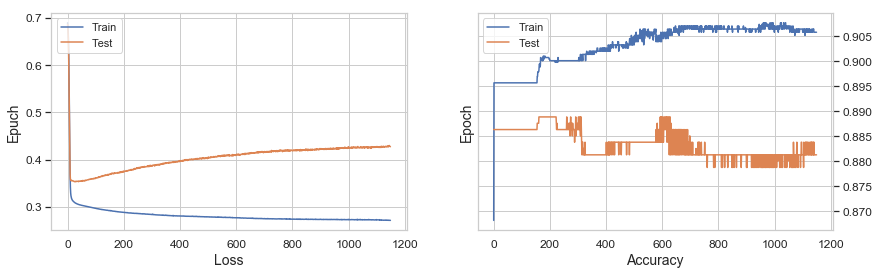

In [165]:
f, axes = plt.subplots (1,2, figsize=(14,4))
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train','Test'], loc='upper left')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.tick_right()
axes[1].legend(['Train','Test'], loc='upper left')

In [167]:
print ('Training set accuracy:', history.history.get('accuracy')[-1])
print ('Test set accuracy:', history.history.get('val_accuracy')[-1])


Training set accuracy: 0.9058154
Test set accuracy: 0.881313145160675


In [171]:
models=[('Logistic Regression',np.round(accuracy_score(Y,Y_predict_train),2), np.round(accuracy_score(Y_TEST,Y_predict_test),2) ),
        ('Decision Tree',np.round(accuracy_score(Y,Y_dtr_predict),2), np.round(accuracy_score(Y_TEST,Y_dt_predict),2) ),
        ('Random Forest',np.round(accuracy_score(Y,Y_rtr_predict),2), np.round(accuracy_score(Y_TEST,Y_rt_predict),2) ),
        ('KNN', np.round(accuracy_score(Y,Y_knnr_predict),2),np.round(accuracy_score(Y_TEST,Y_knn_predict),2) ),
        ('SVM',np.round(accuracy_score(Y,Y_svmr_predict),2),np.round(accuracy_score(Y_TEST,Y_svm_predict),2) ),
        ('Artificial Neural Network', history.history.get('accuracy')[-1], history.history.get('val_accuracy')[-1])
       ]

In [173]:
predict=pd.DataFrame(data=models, columns=['Models', 'Training accuracy','Test accuracy'], index=None)
predict

,Models,Training accuracy,Test accuracy
0,Logistic Regression,0.660000,0.610000
1,Decision Tree,0.850000,0.770000
2,Random Forest,0.760000,0.890000
3,KNN,0.540000,0.870000
4,SVM,0.990000,0.860000
5,Artificial Neural Network,0.905815,0.881313


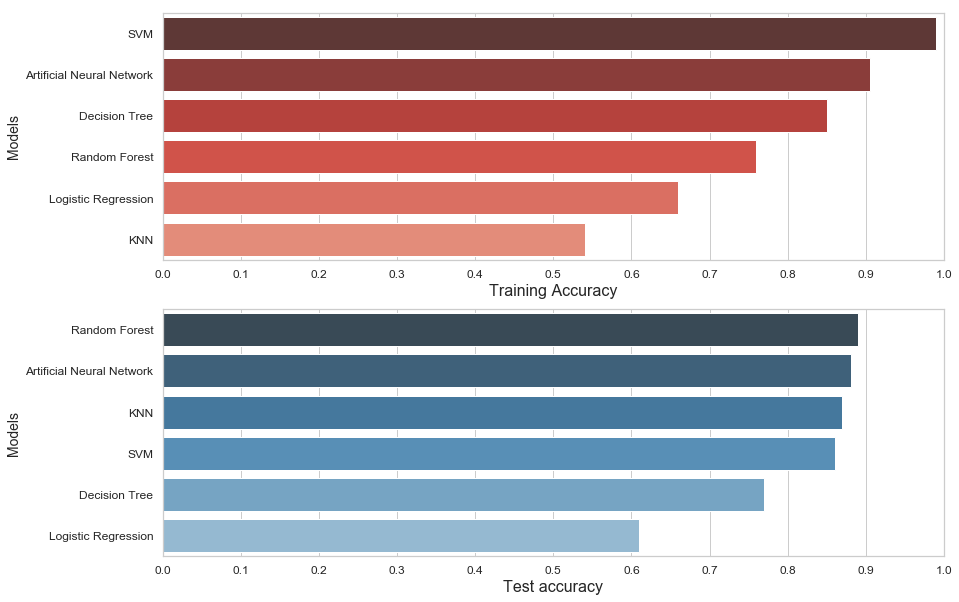

In [182]:
f, axes = plt.subplots(2,1, figsize = (14,10))
predict.sort_values(by=['Training accuracy'], ascending=False, inplace=True)
sns.barplot (x='Training accuracy', y='Models', data=predict, palette='Reds_d', ax=axes[0])
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Models')
axes[0].set_xlim (0, 1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test accuracy'], ascending=False, inplace=True)
sns.barplot (x='Test accuracy', y='Models', data=predict, palette='Blues_d', ax=axes[1])
axes[1].set_xlabel('Test accuracy', size=16)
axes[1].set_ylabel('Models')
axes[1].set_xlim (0, 1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()